# Analysis of Sales

Import the libraries

In [1]:
import pandas as pd
import os

Task1 : Merging all the 12 months data in single CSV file


In [2]:
df = pd.read_csv(r"C:\Users\prash\Desktop\Project\Sales Analysis Project\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


List all CSV files in the directory


In [3]:
files = [file for file in os.listdir(r"C:\Users\prash\Desktop\Project\Sales Analysis Project\Sales_Data")]

Initialize an empty DataFrame to store the concatenated data


In [4]:
AllMonths_Data = pd.DataFrame()

Concatenate all CSV files

In [5]:
for file in files:
    file_path = os.path.join(r"C:\Users\prash\Desktop\Project\Sales Analysis Project\Sales_Data", file)
    df = pd.read_csv(file_path)
    AllMonths_Data = pd.concat([AllMonths_Data, df], ignore_index=True)

AllMonths_Data.to_csv("all_data_New.csv", index=False)


Read in Updated DataFrame

In [6]:
AllMonths_Data = pd.read_csv(r"C:\Users\prash\Desktop\Project\Sales Analysis Project\all_data.csv")



Clean Up the Data

Drop the rows for Nan as we have empty cells which is creating issue in adding month column

In [7]:
nan_df = AllMonths_Data[AllMonths_Data.isna().any(axis=1)]
nan_df.head()

AllMonths_Data = AllMonths_Data.dropna(how='any')
AllMonths_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Now we are getting error that string 'Or' is present as we have taken the first two characters from 'OrderDate'


In [8]:
AllMonths_Data = AllMonths_Data[AllMonths_Data['Order Date'].str[0:2] != 'Or']
AllMonths_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


 Convert columns to the correct type


In [9]:
AllMonths_Data['Quantity Ordered'] = pd.to_numeric(AllMonths_Data['Quantity Ordered'])   # make int
AllMonths_Data['Price Each'] = pd.to_numeric(AllMonths_Data['Price Each']) #make float
AllMonths_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Task 3: Add a Sales Column

In [10]:
AllMonths_Data['Sales'] = AllMonths_Data['Quantity Ordered']*AllMonths_Data['Price Each']
AllMonths_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


Add a Month Column


In [11]:
AllMonths_Data['Month'] = pd.to_datetime(AllMonths_Data['Order Date']).dt.month
AllMonths_Data.head()

C:\Users\prash\AppData\Local\Temp\ipykernel_18676\1702922526.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  AllMonths_Data['Month'] = pd.to_datetime(AllMonths_Data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


Add a City Column


In [12]:
# We can .apply()
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2]
AllMonths_Data['City'] = AllMonths_Data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
AllMonths_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001


What was the best month for Sales? How much was earned that month?

In [13]:
Results = AllMonths_Data.groupby('Month').sum() 
AllMonths_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001


Import other library

In [14]:
import matplotlib.pyplot as plt

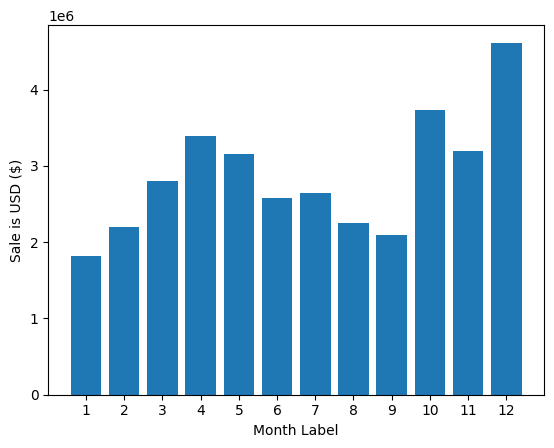

In [15]:
months = range(1,13)
plt.bar(months, Results['Sales'])
plt.xticks(months)
plt.xlabel("Month Label")
plt.ylabel("Sale is USD ($)")
plt.show()

Which City has the highest number of Sales?

In [16]:
Results = AllMonths_Data.groupby('City').sum() 
Results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
City,,,,,,,,
Atlanta GA 30301,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04-12-2019 10:5804/19/19 14:2904/27/19 12:2004...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",2795498.58,104794
Austin TX 73301,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104-11-2019 16:5904/20/19 20:5304...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",1819581.75,69829
Boston MA 02215,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04-07-2019 22:3004-08-2019 14:0504-09-2019 23:...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",3661642.01,141112
Dallas TX 75001,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904-0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",2767975.40,104620
Los Angeles CA 90001,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04-12-2019 14:3804-12-2019 14:3804/30/19 09:27...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",5452570.80,208325
New York City NY 10001,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04-04-2019 20:3004/27/19 00:3004-11-2019 10:23...,"149 Dogwood St, New York City, NY 10001433 Hil...",4664317.43,175741
Portland ME 04101,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304-0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",449758.27,17144
Portland OR 97035,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",1870732.34,70621
San Francisco CA 94016,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",8262203.91,315520


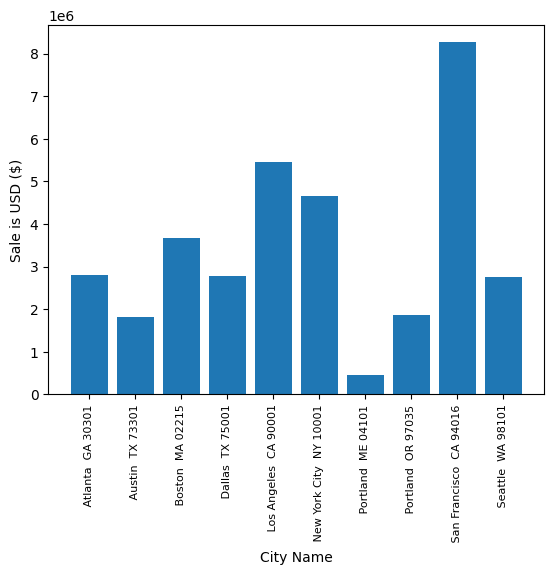

In [17]:
import matplotlib.pyplot as plt

cities = [city for city, df in AllMonths_Data.groupby('City')]
plt.bar(cities, Results['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.xlabel("City Name")
plt.ylabel("Sale is USD ($)")
plt.show()


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [18]:
AllMonths_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001


In [19]:
AllMonths_Data['Order Date'] = pd.to_datetime(AllMonths_Data['Order Date'])

C:\Users\prash\AppData\Local\Temp\ipykernel_18676\436002859.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  AllMonths_Data['Order Date'] = pd.to_datetime(AllMonths_Data['Order Date'])


In [20]:
AllMonths_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001


In [21]:
AllMonths_Data['Hour'] = AllMonths_Data['Order Date'].dt.hour
AllMonths_Data['Minute'] = AllMonths_Data['Order Date'].dt.minute
AllMonths_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001,9,27


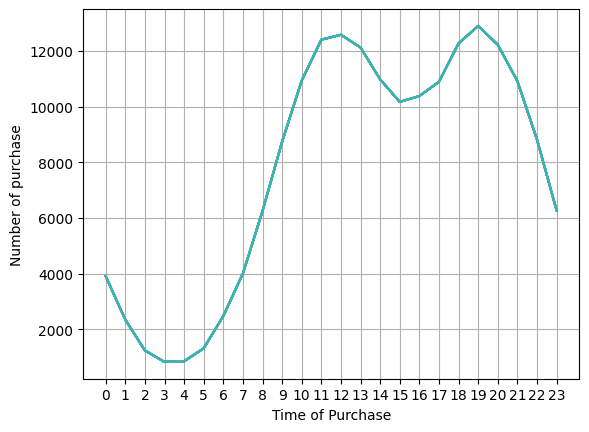

In [22]:
Hours = [hour for hour, df in AllMonths_Data.groupby('Hour')]

plt.plot(Hours, AllMonths_Data.groupby(['Hour']).count())
plt.grid()
plt.xlabel("Time of Purchase")
plt.ylabel("Number of purchase")
plt.xticks(Hours)
plt.show()

## My recommendation would be 11 AM (11:00) or & 7 PM (19:00).

Question 4: What products are mostly sold together?

In [23]:
# Create a new column 'Grouped_Products' to store products sold together
AllMonths_Data['Grouped_Products'] = AllMonths_Data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Merge the DataFrame with itself on 'Order ID'
merged_df = pd.merge(AllMonths_Data, AllMonths_Data, on='Order ID')

# Filter out rows where product names are not equal
grouped_products_df = merged_df[merged_df['Product_x'] != merged_df['Product_y']]

# Create a new column 'Product_Pair' to store pairs of products sold together
grouped_products_df['Product_Pair'] = grouped_products_df[['Product_x', 'Product_y']].apply(lambda x: ', '.join(sorted(x)), axis=1)

# Count occurrences of each product pair
product_pair_counts = grouped_products_df['Product_Pair'].value_counts()

AllMonths_Data.head()


C:\Users\prash\AppData\Local\Temp\ipykernel_18676\2690388039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_products_df['Product_Pair'] = grouped_products_df[['Product_x', 'Product_y']].apply(lambda x: ', '.join(sorted(x)), axis=1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute,Grouped_Products
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX 75001,8,46,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA 02215,22,30,Bose SoundSport Headphones
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA 90001,14,38,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001,14,38,"Google Phone, Wired Headphones"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA 90001,9,27,Wired Headphones


In [24]:
# Convert product_pair_counts to a DataFrame
result_df = pd.DataFrame({'Product Pair': product_pair_counts.index, 'Count': product_pair_counts.values})

# Display products sold together as a DataFrame
print(result_df[result_df['Count'] > 1].reset_index(drop=True))


                                   Product Pair  Count
0              Lightning Charging Cable, iPhone   2030
1            Google Phone, USB-C Charging Cable   1998
2                      Wired Headphones, iPhone    924
3                Google Phone, Wired Headphones    846
4              Apple Airpods Headphones, iPhone    746
..                                          ...    ...
154  34in Ultrawide Monitor, LG Washing Machine      2
155                   LG Dryer, Vareebadd Phone      2
156        27in FHD Monitor, LG Washing Machine      2
157                     Flatscreen TV, LG Dryer      2
158   AA Batteries (4-pack), LG Washing Machine      2

[159 rows x 2 columns]


What products sold the most? Why do you think it sold the most?

In [25]:
## grouped the data by 'Product' and calculated the total quantity ordered for each product. 

Product_Group = AllMonths_Data.groupby(['Product'])['Quantity Ordered'].sum()
Product_Group

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [26]:
##  to identify the top-selling products and explore why they sold the most.

top_selling_products = Product_Group.sort_values(ascending=False)
top_selling_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [27]:
## Potential reasons for their success based on factors like customer demand, marketing efforts, product features, and competitive pricing.
    

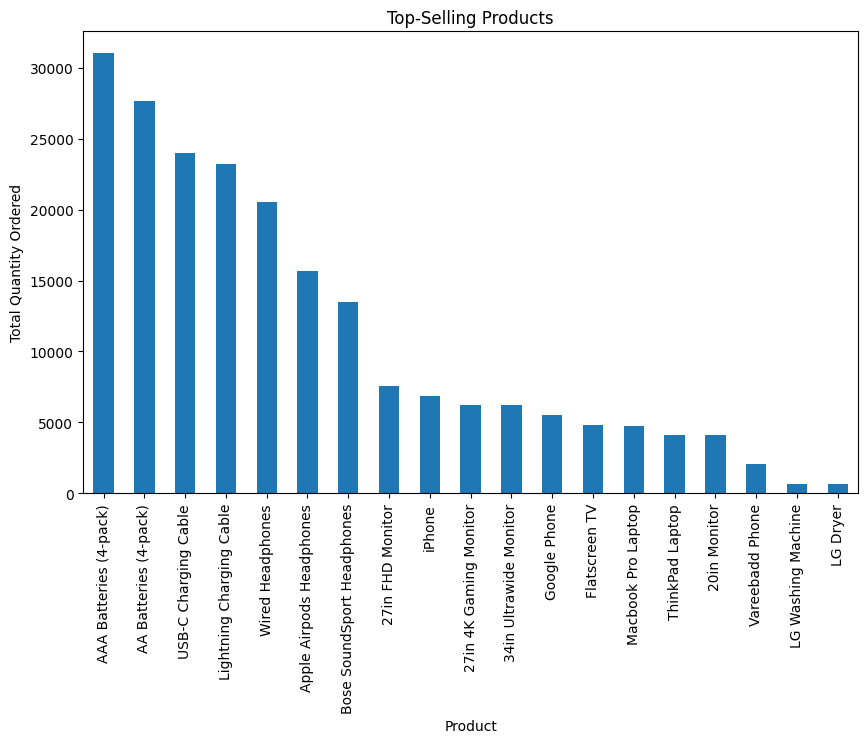

In [28]:
# Bar chart for top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Top-Selling Products')
plt.show()
